<a href="https://www.kaggle.com/code/ayeshashaikh232/us-elections-dataset?scriptVersionId=127445997" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Necessary Libraries

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import plotly.graph_objs as go
import plotly.express as px

In [2]:
df=pd.read_csv('/kaggle/input/us-elections-dataset/1976-2020-president.csv')
df

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,56,83,68,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,20210113,NaN,LIBERTARIAN
4283,2020,WYOMING,WY,56,83,68,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,20210113,NaN,OTHER
4284,2020,WYOMING,WY,56,83,68,US PRESIDENT,NaN,NaN,True,1739,278503,20210113,NaN,OTHER
4285,2020,WYOMING,WY,56,83,68,US PRESIDENT,OVERVOTES,NaN,False,279,278503,20210113,NaN,OTHER


In [3]:
df['party_simplified'].unique()

array(['DEMOCRAT', 'REPUBLICAN', 'OTHER', 'LIBERTARIAN'], dtype=object)

In [4]:
df=pd.read_csv('/kaggle/input/us-elections-dataset/1976-2020-president.csv',usecols=['year','state','office','candidate','party_detailed','writein','candidatevotes','totalvotes','party_simplified'])
df

,year,state,office,candidate,party_detailed,writein,candidatevotes,totalvotes,party_simplified
0,1976,ALABAMA,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,DEMOCRAT
1,1976,ALABAMA,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,REPUBLICAN
2,1976,ALABAMA,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,OTHER
3,1976,ALABAMA,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,OTHER
4,1976,ALABAMA,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,OTHER
...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,LIBERTARIAN
4283,2020,WYOMING,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,OTHER
4284,2020,WYOMING,US PRESIDENT,NaN,NaN,True,1739,278503,OTHER
4285,2020,WYOMING,US PRESIDENT,OVERVOTES,NaN,False,279,278503,OTHER


This will print the first few rows of the DataFrame so that we can see what kind of data we're working with.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              4287 non-null   int64 
 1   state             4287 non-null   object
 2   office            4287 non-null   object
 3   candidate         4000 non-null   object
 4   party_detailed    3831 non-null   object
 5   writein           4284 non-null   object
 6   candidatevotes    4287 non-null   int64 
 7   totalvotes        4287 non-null   int64 
 8   party_simplified  4287 non-null   object
dtypes: int64(3), object(6)
memory usage: 301.6+ KB


In [6]:
df.describe()

,year,candidatevotes,totalvotes
count,4287.000000,4.287000e+03,4.287000e+03
mean,1999.080942,3.119076e+05,2.366924e+06
std,14.220014,7.648011e+05,2.465008e+06
min,1976.000000,0.000000e+00,1.235740e+05
25%,1988.000000,1.177000e+03,6.522740e+05
50%,2000.000000,7.499000e+03,1.569180e+06
75%,2012.000000,1.992415e+05,3.033118e+06
max,2020.000000,1.111025e+07,1.750088e+07


fill all nall data by 'NO_DATA'

In [7]:
df.fillna('NO_DATA',inplace=True)


In [8]:
df['state'].unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE',
       'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA',
       'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

# State wise total_votes

In [9]:
state=df['state'].unique()
figure = px.histogram(df, x='state' , y="totalvotes",title ="state wise total_votes")
figure.show()

This will group the data by state and unique values the total number of votes and candidate votes for each state. The results will be sorted in descending order by the total number of votes.

# total votes in elction

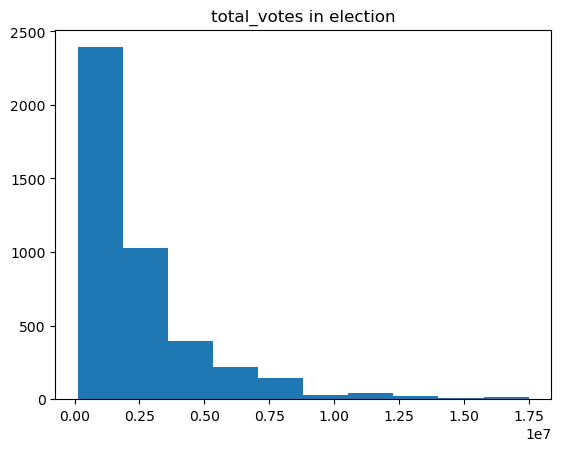

In [10]:
plt.hist(df['totalvotes'])
plt.title('total_votes in election')
plt.show()

By summing up the total votes across all states for each presidential election, we can determine the overall voter turnout for each election year. This can help to identify trends in voter turnout over time.

# total candidate votes in election

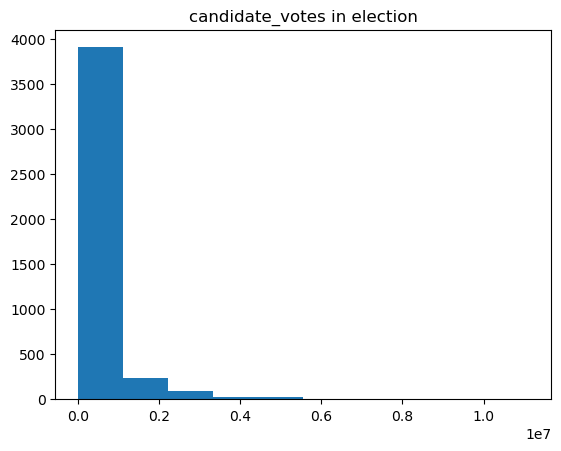

In [11]:
plt.hist(df['candidatevotes'])  
plt.title('candidate_votes in election')
plt.show()

# Candidate Votes vs Total Votes in US Presidential Elections

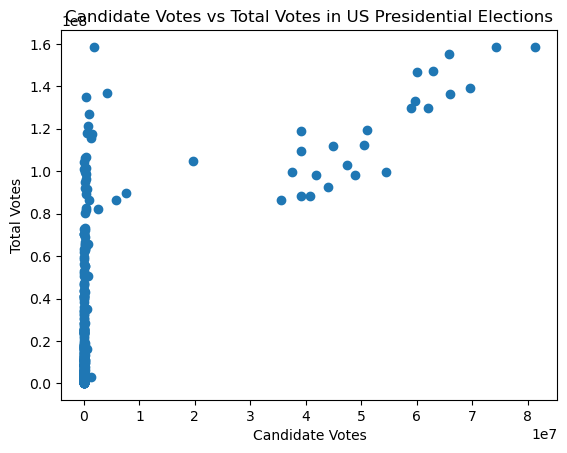

In [12]:
data = df.groupby(['year', 'candidate'])[['candidatevotes', 'totalvotes']].sum()
plt.scatter(data['candidatevotes'], data['totalvotes'])
plt.title('Candidate Votes vs Total Votes in US Presidential Elections')
plt.xlabel('Candidate Votes')
plt.ylabel('Total Votes')

# Display the chart
plt.show()

In the US presidential election, the winner is determined by the totalvotes rather than the candidate vote. Analyzing the differences between the two can help identify areas where the candidate vote system may have an impact on the election outcome.

# Voter turnout

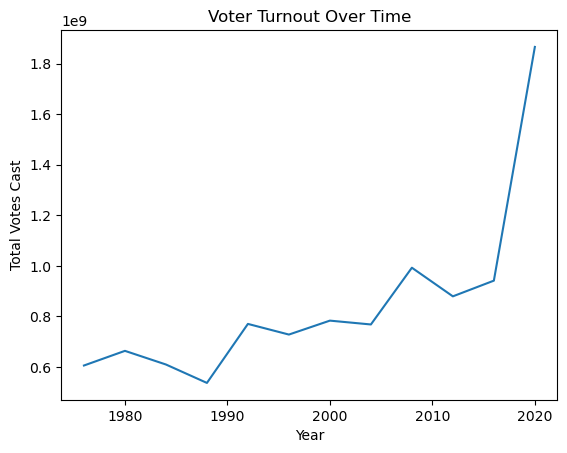

In [13]:
votes_by_year = df.groupby('year')['totalvotes'].sum()
plt.plot(votes_by_year.index, votes_by_year.values)
plt.xlabel('Year')
plt.ylabel('Total Votes Cast')
plt.title('Voter Turnout Over Time')
plt.show()

Voter turnout can be calculated by dividing the total number of votes cast in each presidential election by the total voting age population (VAP). This can help to determine the overall level of political engagement in the country

# Political preferences

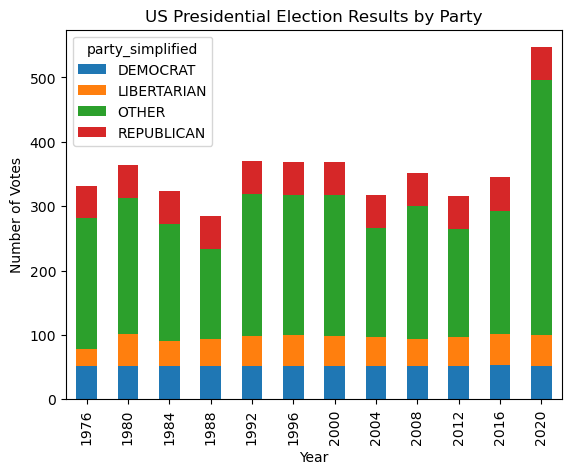

In [14]:
data=df.groupby(['year', 'party_simplified'])['party_simplified'].count().unstack()
data.plot(kind='bar', stacked=True)
plt.title('US Presidential Election Results by Party')
plt.xlabel('Year')
plt.ylabel('Number of Votes')
plt.show()

Analyzing election data can provide insights into political preferences, including which parties and candidates are favored by different groups of voters. This information can be used by political campaigns to target specific groups with their messaging.

# Top 3 most state with highst total votes

In [15]:
df = df.groupby(by=['state', 'party_simplified', 'candidatevotes'])[['totalvotes']].sum().reset_index()
df = df.sort_values(by=['totalvotes'], ascending=False).head(3)
fig = px.bar(df,x='state',y='totalvotes',title='Top 3 Most state with highst vote', text_auto='.2s',height = 700)
fig.show()

By sorting the data by the total number of votes cast in each state for each presidential election and taking the top three rows, we can identify the three states with the highest levels of political engagement.

# In summary

the US presidential election data from 1976 to 2020 provides a wealth of information on voter behavior, political preferences, and trends in voter turnout over time. By analyzing this data, we can gain valuable insights into the political landscape of the United States.

# Ideas for future work on this topic

Historical Analysis: use historical data to analyze how voting patterns have changed over time and how this has been influenced by historical events, such as wars, economic crises, civil rights movements, and other major social and political developments.

International Comparison: compare the US presidential election data with data from other countries to analyze how voting patterns and electoral systems differ across countries and how this influences political outcomes.

Campaign Finance Analysis: campaign finance data to analyze how money is spent on political campaigns and how this influences political outcomes. This could provide insights into issues of corruption, political influence, and campaign finance reform.